# GRIPMAY2021 @ The Spark Foundation
## Task #3 : Perform Exploratory Data Analysis
### Objective : As a business manager, try to find out the weak areas where you can work to make more profit.
### Author: Ruchit Dobariya

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Check wether the data set is having any null values
data.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Now lets know the number of elements each attributes of the data set is having

In [5]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [7]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [8]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Aberdeen           1
Hagerstown         1
Billings           1
Pensacola          1
Abilene            1
Name: City, Length: 531, dtype: int64

In [9]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [10]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Aberdeen           1
Hagerstown         1
Billings           1
Pensacola          1
Abilene            1
Name: City, Length: 531, dtype: int64

In [11]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### From above, we can observe that there is only one country in the Data set that is United States, and for our conclusion the postal codes are also not required, thus we can delete those columns.

In [14]:
data.drop(['Country','Postal Code'], axis=1,inplace=True)


## Data visualization for better understanding

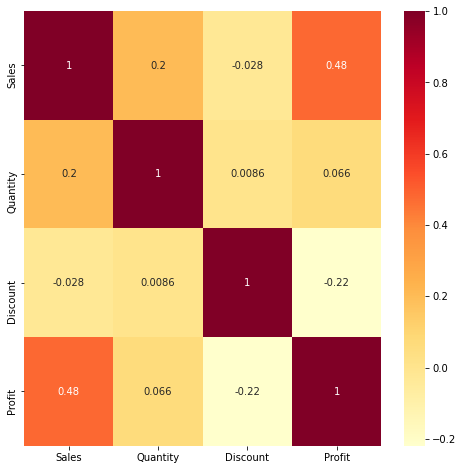

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot =True,cmap = 'YlOrRd')
plt.show()

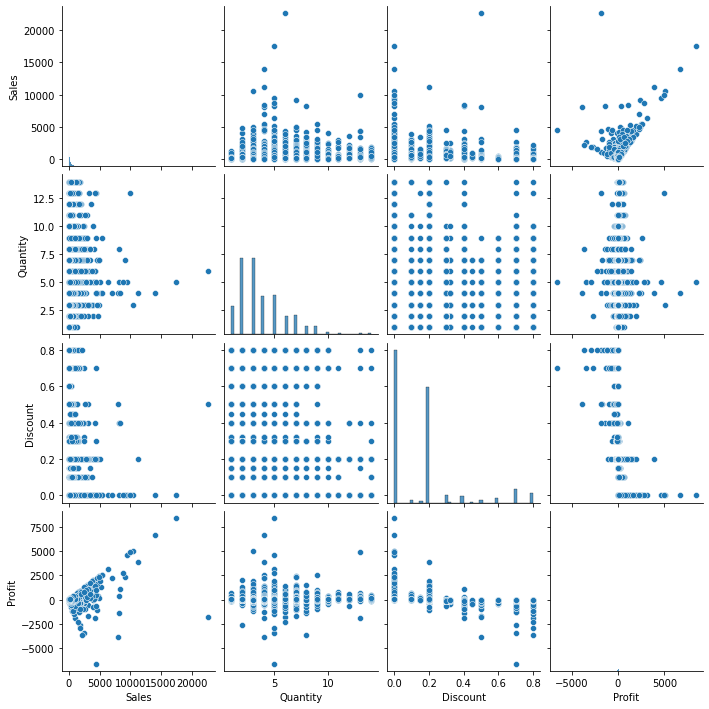

In [16]:
sns.pairplot(data)
plt.show()

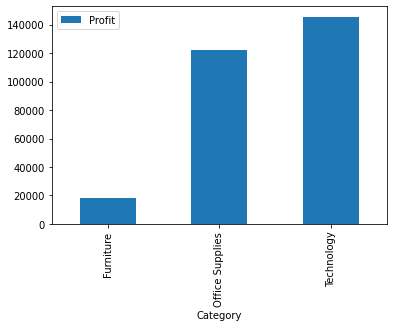

In [17]:
x=data.groupby(by="Category")[['Profit']].sum()
b=x.sort_values(by=['Profit'],ascending=True)
b.plot(kind='bar')
plt.show()

### From above graph we can see that the profit earned from furniture is the lowest, and the profit earned from technology is highest, and the Office Supplies profit is somewhat similar to Technology, but for now lets focus on Furniture.

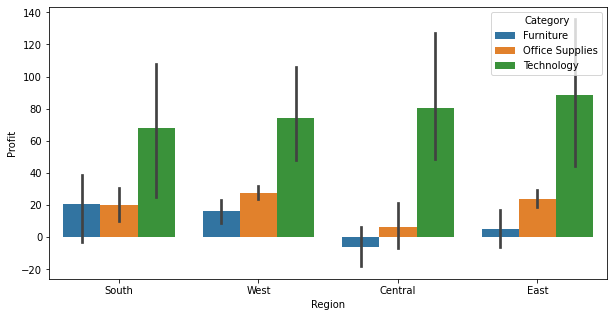

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region',y='Profit', hue='Category',data=data)
plt.show()

### Above chart is the region wise distribution of the category profit, from which we can see that the lowest profit of furniture is from central zone, then its the east zone, then the west zone and finally its the south zone.

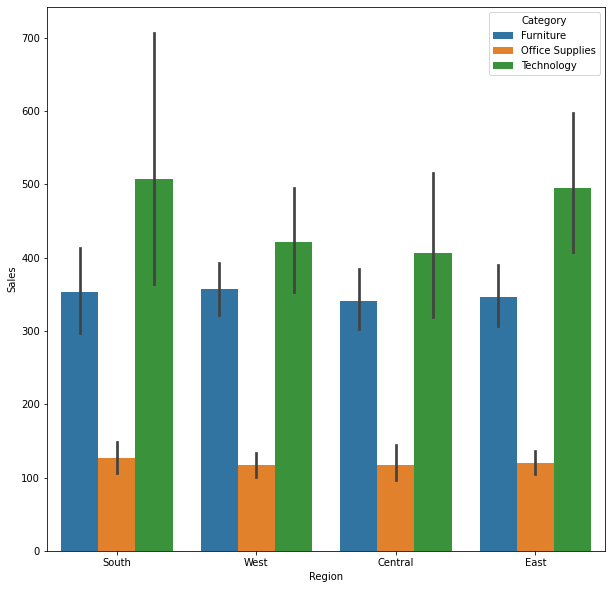

In [19]:
plt.figure(figsize=(10,10))

sns.barplot(x='Region',y='Sales', hue='Category',data=data)
plt.show()

### Above chart depicts the sales of the region, from which we can that the sales of furniture is more than the office supplies, but the profit made is very less compared to office supplies.

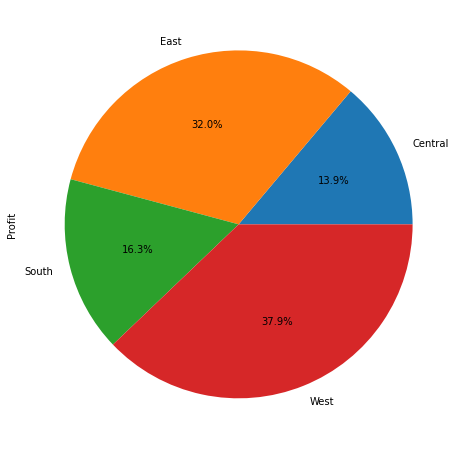

In [20]:
plt.figure(figsize=(8,8))
data.groupby('Region')['Profit'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### Above is a pie chart depicting the over all sales percent in the different region, from which it is infered that central zone has the lowest sale among the other zones.

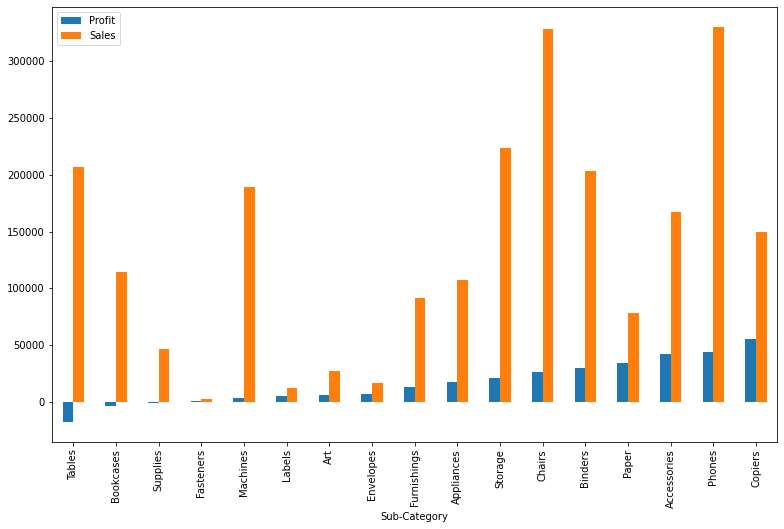

In [21]:
subcategory_grpby=data.groupby(by="Sub-Category")[['Profit','Sales']].sum()
subprofit=subcategory_grpby.sort_values(by=['Profit'],ascending=True).plot(kind='bar',figsize=(13,8))

### From above bar graph we can see that the highest profit among the sub category is of Copiers and the lowest is of Tables. The highest sales is of Phones and the lowest sale is of Fasteners.

### Thus from the above based graphs and chart, it is concluded that the increase in sales in the furniture will not affect the profit, but increasing the prize value will, and maintaing the optimum sales in every reagion is the must for better profit.